# Bracketing the Minima

In [1]:
import numpy as np
import matplotlib.pyplot as plt

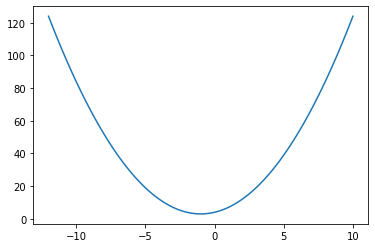

In [2]:
f = lambda x:(x**2+2*x+4)
x = np.linspace(-12,10,99)
y = f(x)
plt.plot(x,y)
plt.show()

In [3]:
x[np.where(y == min(y))].item()

-1.0

In [4]:
def bracketing(f,a,b,delta,epsilon):
    y1 = f(a)
    y2 = f(b)
    x = a + delta
    y3 = f(x)
    best = y1
    while delta > epsilon:
        delta = delta/2
        if y3 < y1 and y3 < y2 and best >= y3:
            print(x)
            if f(x+delta) < f(x-delta):
                x = x + delta
            else:
                x = x - delta
            if abs(a-x) < abs(x-b):
                x = bracketing(f,x,b,delta,epsilon)
            else:
                x = bracketing(f,a,x,delta,epsilon)
            best = f(x)
    return x

In [5]:
a = -12
b  = 10
delta = abs(b-a)/4
epsilon = 0.1
f = lambda x:(x**2+2*x+4)
x = bracketing(f, a, b, delta,epsilon)
print(x)

-6.5
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0
-1.0


# Gradient Descent with visualisation


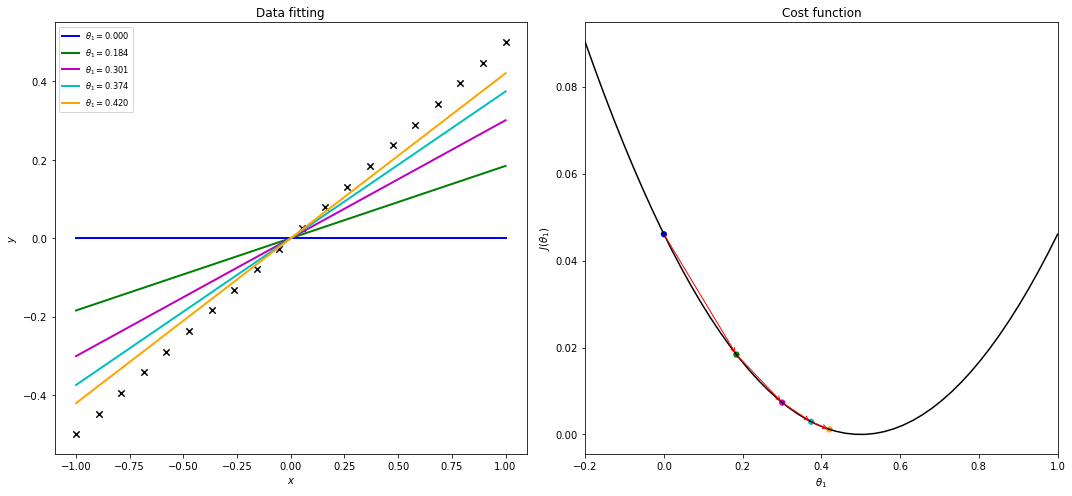

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta1_true = 0.5
x = np.linspace(-1,1,m)
y = theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta1):
    """The cost function, J(theta1) describing the goodness of fit."""
    theta1 = np.atleast_2d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta1))**2, axis=1)/2

def hypothesis(x, theta1):
    """Our "hypothesis function", a straight line through the origin."""
    return theta1*x

# First construct a grid of theta1 parameter pairs and their corresponding
# cost function values.
theta1_grid = np.linspace(-0.2,1,50)
J_grid = cost_func(theta1_grid[:,np.newaxis])

# The cost function as a function of its single parameter, theta1.
ax[1].plot(theta1_grid, J_grid, 'black')

# Take N steps with learning rate alpha down the steepest gradient,
# starting at theta1 = 0.
N = 5
alpha = 1
theta1 = [0]
J = [cost_func(theta1[0])[0]]
for j in range(N-1):
    last_theta1 = theta1[-1]
    this_theta1 = last_theta1 - alpha / m * np.sum((hypothesis(x, last_theta1) - y) * x)  # gradient-descent
    theta1.append(this_theta1)
    J.append(cost_func(this_theta1))

# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, theta1[0]), color=colors[0], lw=2,
           label=r'$\theta_1 = {:.3f}$'.format(theta1[0]))
for j in range(1,N):
    ax[1].annotate('', xy=(theta1[j], J[j]), xytext=(theta1[j-1], J[j-1]),
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, theta1[j]), color=colors[j], lw=2,
               label=r'$\theta_1 = {:.3f}$'.format(theta1[j]))

# Labels, titles and a legend.
ax[1].scatter(theta1, J, c=colors, s=40, lw=0)
ax[1].set_xlim(-0.2,1)
ax[1].set_xlabel(r'$\theta_1$')
ax[1].set_ylabel(r'$J(\theta_1)$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data fitting')
ax[0].legend(loc='upper left', fontsize='small')

plt.tight_layout()
plt.show()

# Steepest Descent with visualisation 

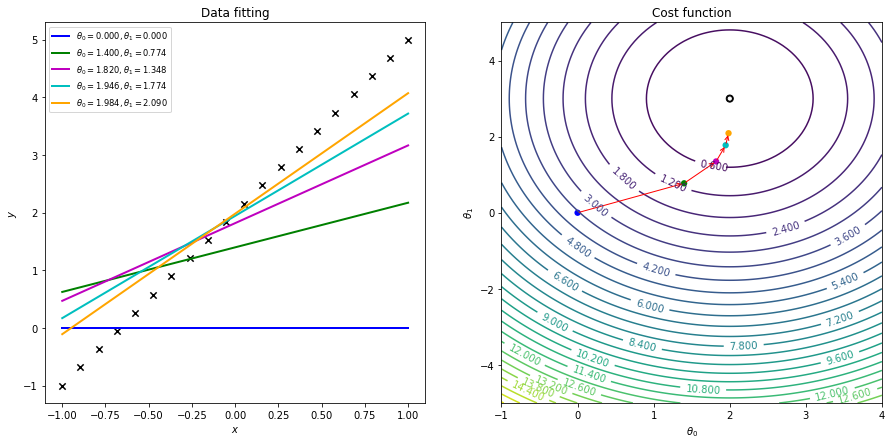

In [7]:
import numpy as np# Steepest Descent with visualisation umpy as np
import matplotlib.pyplot as plt

# The data to fit
m = 20
theta0_true = 2
theta1_true = 3
x = np.linspace(-1,1,m)
y = theta0_true + theta1_true * x

# The plot: LHS is the data, RHS will be the cost function.
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
ax[0].scatter(x, y, marker='x', s=40, color='k')

def cost_func(theta0, theta1):
    """The cost function, J(theta0, theta1) describing the goodness of fit."""
    theta0 = np.atleast_3d(np.asarray(theta0))
    theta1 = np.atleast_3d(np.asarray(theta1))
    return np.average((y-hypothesis(x, theta0, theta1))**2, axis=2)/2

def hypothesis(x, theta0, theta1):
    """Our "hypothesis function", a straight line."""
    return theta0 + theta1*x

# First construct a grid of (theta0, theta1) parameter pairs and their
# corresponding cost function values.
theta0_grid = np.linspace(-1,4,101)
theta1_grid = np.linspace(-5,5,101)
J_grid = cost_func(theta0_grid[np.newaxis,:,np.newaxis],
                   theta1_grid[:,np.newaxis,np.newaxis])

# A labeled contour plot for the RHS cost function
X, Y = np.meshgrid(theta0_grid, theta1_grid)
contours = ax[1].contour(X, Y, J_grid, 30)
ax[1].clabel(contours)
# The target parameter values indicated on the cost function contour plot
ax[1].scatter([theta0_true]*2,[theta1_true]*2,s=[50,10], color=['k','w'])

# Take N steps with learning rate alpha down the steepest gradient,
# starting at (theta0, theta1) = (0, 0).
N = 5
alpha = 0.7
theta = [np.array((0,0))]
J = [cost_func(*theta[0])[0]]
for j in range(N-1):
    last_theta = theta[-1]
    this_theta = np.empty((2,))
    this_theta[0] = last_theta[0] - alpha / m * np.sum((hypothesis(x, *last_theta) - y))
    this_theta[1] = last_theta[1] - alpha / m * np.sum((hypothesis(x, *last_theta) - y) * x)
    theta.append(this_theta)
    J.append(cost_func(*this_theta))


# Annotate the cost function plot with coloured points indicating the
# parameters chosen and red arrows indicating the steps down the gradient.
# Also plot the fit function on the LHS data plot in a matching colour.
colors = ['b', 'g', 'm', 'c', 'orange']
ax[0].plot(x, hypothesis(x, *theta[0]), color=colors[0], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[0]))
for j in range(1,N):
    ax[1].annotate('', xy=theta[j], xytext=theta[j-1],
                   arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                   va='center', ha='center')
    ax[0].plot(x, hypothesis(x, *theta[j]), color=colors[j], lw=2,
           label=r'$\theta_0 = {:.3f}, \theta_1 = {:.3f}$'.format(*theta[j]))
ax[1].scatter(*zip(*theta), c=colors, s=40, lw=0)

# Labels, titles and a legend.
ax[1].set_xlabel(r'$\theta_0$')
ax[1].set_ylabel(r'$\theta_1$')
ax[1].set_title('Cost function')
ax[0].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$y$')
ax[0].set_title('Data fitting')
axbox = ax[0].get_position()
# Position the legend by hand so that it doesn't cover up any of the lines.
ax[0].legend(fontsize='small')

plt.show()

# Constrained Optimization: Definition & Formulation

__Constrained Optimization__ is the Process of __Maximizing or
Minimizing__ a __Desired Objective Function__ while Satisfying a Set of
__Prevailing Constraints__

## Karush–Kuhn–Tucker conditions

In mathematical optimization, the Karush–Kuhn–Tucker (KKT) conditions, also known as the Kuhn–Tucker conditions, are first derivative tests (sometimes called first-order necessary conditions) for a solution in nonlinear programming to be optimal, provided that some regularity conditions are satisfied.

Consider the following nonlinear minimization or maximization problem:
Optimize ${\displaystyle f(\mathbf {x} )}$
subject to
${\displaystyle g_{i}(\mathbf {x} )\leq 0,}$
${\displaystyle h_{i}(\mathbf {x} )=0.}$
where ${\displaystyle \mathbf {x} \in \mathbf {X} }$ is the optimization variable chosen from a convex subset of ${\displaystyle \mathbb {R} ^{n}}$, ${\displaystyle f}$ is the objective or utility function, ${\displaystyle g_{i}\ (i=1,\ldots ,m)}$ are the inequality constraint functions and ${\displaystyle h_{i}\ (i=1,\ldots ,\ell )}$ are the equality constraint functions. The numbers of inequalities and equalities are denoted by ${\displaystyle m} \; \;and\;\; {\displaystyle \ell }$  respectively.

Corresponding to the constraint optimization problem one can form the Lagrangian function:
${\displaystyle L(\mathbf {x} ,\mathbf {\mu } ,\mathbf {\lambda } )=f(\mathbf {x} )+\mathbf {\mu } ^{\top }\mathbf {g} (\mathbf {x} )+\mathbf {\lambda } ^{\top }\mathbf {h} (\mathbf {x} )}$

where ${\displaystyle \mathbf {g} (\mathbf {x} )=\left(g_{1}(\mathbf {x} ),\ldots ,g_{m}(\mathbf {x} )\right)^{\top }}, {\displaystyle \mathbf {h} (\mathbf {x} )=\left(h_{1}(\mathbf {x} ),\ldots ,h_{\ell }(\mathbf {x} )\right)^{\top }}$

### Necessary conditions

- __Stationarity__

For maximizing ${\displaystyle f(x)}: {\displaystyle \nabla f(x^{*})-\sum _{i=1}^{m}\mu _{i}\nabla g_{i}(x^{*})-\sum _{j=1}^{\ell }\lambda _{j}\nabla h_{j}(x^{*})=0,}$

For minimizing ${\displaystyle f(x)}: {\displaystyle \nabla f(x^{*})+\sum _{i=1}^{m}\mu _{i}\nabla g_{i}(x^{*})+\sum _{j=1}^{\ell }\lambda _{j}\nabla h_{j}(x^{*})=0,}$

- __Primal feasibility__

${\displaystyle g_{i}(x^{*})\leq 0,{\text{ for }}i=1,\ldots ,m}$


${\displaystyle h_{j}(x^{*})=0,{\text{ for }}j=1,\ldots ,\ell \,\!}$

- __Dual feasibility__

${\displaystyle \mu _{i}\geq 0,{\text{ for }}i=1,\ldots ,m}$

- __Complementary slackness__


${\displaystyle \mu _{i}g_{i}(x^{*})=0,{\text{ for }}\;i=1,\ldots ,m.}$

## Example Problem Statement:

1. Objective Function
$$ min \;\;\;x_1x_4(x_1+x_2+x_3) + x_3$$
2. Subject To
$$ x_1x_2x_3x_4 \geq 25$$
$$ x_1^2 + x_2^2 + x_3^2 + x_4^2 = 40$$
3. Bounds
$$ 1 \leq x_1,x_2,x_3,x_4 \leq 5$$
4. Initial Guess
$$ x_0 = (1,5,5,1)$$

In [8]:
import numpy as np
from scipy.optimize import minimize

In [9]:
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0

def constraint2(x):
    sum_sq = 40
    for i in range(4):
        sum_sq = sum_sq - x[i]**2
    return sum_sq

In [10]:
x0 = [1,5,5,1]
objective(x0)

16

In [11]:
b = (1.0,5.0)
bnds = (b,b,b,b)
con1 = {'type': 'ineq', 'fun': constraint1}
con2 = {'type': 'eq', 'fun': constraint2}
cons = [con1,con2]

In [12]:
sol = minimize(objective,x0,method='SLSQP',bounds=bnds,constraints=cons)

In [13]:
print(sol)

     fun: 17.01401724563517
     jac: array([14.57227015,  1.37940764,  2.37940764,  9.56415057])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([1.        , 4.7429961 , 3.82115462, 1.37940765])


In [14]:
print(sol.x)

[1.         4.7429961  3.82115462 1.37940765]


In [15]:
print(sol.fun)

17.01401724563517
